In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
import matplotlib.pyplot as pp
#from mlxtend.plotting import plot_decision_regions

cols = ["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]

mmg = pd.read_csv("mammographic_masses.data.txt", na_values=["?"], names = cols)

data = np.array(mmg.to_records())
print (data)


[(0, 5.0, 67.0, 3.0, 5.0, 3.0, 1) (1, 4.0, 43.0, 1.0, 1.0, nan, 1)
 (2, 5.0, 58.0, 4.0, 5.0, 3.0, 1) (3, 4.0, 28.0, 1.0, 1.0, 3.0, 0)
 (4, 5.0, 74.0, 1.0, 5.0, nan, 1) (5, 4.0, 65.0, 1.0, nan, 3.0, 0)
 (6, 4.0, 70.0, nan, nan, 3.0, 0) (7, 5.0, 42.0, 1.0, nan, 3.0, 0)
 (8, 5.0, 57.0, 1.0, 5.0, 3.0, 1) (9, 5.0, 60.0, nan, 5.0, 1.0, 1)
 (10, 5.0, 76.0, 1.0, 4.0, 3.0, 1) (11, 3.0, 42.0, 2.0, 1.0, 3.0, 1)
 (12, 4.0, 64.0, 1.0, nan, 3.0, 0) (13, 4.0, 36.0, 3.0, 1.0, 2.0, 0)
 (14, 4.0, 60.0, 2.0, 1.0, 2.0, 0) (15, 4.0, 54.0, 1.0, 1.0, 3.0, 0)
 (16, 3.0, 52.0, 3.0, 4.0, 3.0, 0) (17, 4.0, 59.0, 2.0, 1.0, 3.0, 1)
 (18, 4.0, 54.0, 1.0, 1.0, 3.0, 1) (19, 4.0, 40.0, 1.0, nan, nan, 0)
 (20, nan, 66.0, nan, nan, 1.0, 1) (21, 5.0, 56.0, 4.0, 3.0, 1.0, 1)
 (22, 4.0, 43.0, 1.0, nan, nan, 0) (23, 5.0, 42.0, 4.0, 4.0, 3.0, 1)
 (24, 4.0, 59.0, 2.0, 4.0, 3.0, 1) (25, 5.0, 75.0, 4.0, 5.0, 3.0, 1)
 (26, 2.0, 66.0, 1.0, 1.0, nan, 0) (27, 5.0, 63.0, 3.0, nan, 3.0, 0)
 (28, 5.0, 45.0, 4.0, 5.0, 3.0, 1) (29, 5.0,

In [2]:

#data_n = list(np.where(data=='?')[0])
mmg.describe()

mmg.dropna(inplace=True)
print mmg

     BI-RADS   Age  Shape  Margin  Density  Severity
0        5.0  67.0    3.0     5.0      3.0         1
2        5.0  58.0    4.0     5.0      3.0         1
3        4.0  28.0    1.0     1.0      3.0         0
8        5.0  57.0    1.0     5.0      3.0         1
10       5.0  76.0    1.0     4.0      3.0         1
11       3.0  42.0    2.0     1.0      3.0         1
13       4.0  36.0    3.0     1.0      2.0         0
14       4.0  60.0    2.0     1.0      2.0         0
15       4.0  54.0    1.0     1.0      3.0         0
16       3.0  52.0    3.0     4.0      3.0         0
17       4.0  59.0    2.0     1.0      3.0         1
18       4.0  54.0    1.0     1.0      3.0         1
21       5.0  56.0    4.0     3.0      1.0         1
23       5.0  42.0    4.0     4.0      3.0         1
24       4.0  59.0    2.0     4.0      3.0         1
25       5.0  75.0    4.0     5.0      3.0         1
28       5.0  45.0    4.0     5.0      3.0         1
29       5.0  55.0    4.0     4.0      3.0    

In [3]:


y = mmg["Severity"].values
X = mmg[["BI-RADS", "Age", "Shape", "Margin", "Density"]].values

Z = mmg[["BI-RADS", "Age", "Shape", "Margin", "Density", "Severity"]].values

#Z = preprocessing.StandardScaler().fit_transform(Z)

X = preprocessing.StandardScaler().fit_transform(X)

print X

[[ 0.3211177   0.7650629   0.17563638  1.39618483  0.24046607]
 [ 0.3211177   0.15127063  0.98104077  1.39618483  0.24046607]
 [-0.20875843 -1.89470363 -1.43517241 -1.157718    0.24046607]
 ..., 
 [-0.20875843  0.56046548  0.98104077  1.39618483  0.24046607]
 [ 0.3211177   0.69686376  0.98104077  1.39618483  0.24046607]
 [-0.20875843  0.42406719  0.17563638  0.11923341  0.24046607]]


In [50]:
print "X shape: %d,%d | y shape: %d" % (X.shape[0], X.shape[1], y.shape[0])

X shape: 830,5 | y shape: 830


In [4]:
#SVM

n, d = X.shape
y_pred = np.zeros((n, 1))
y_temp = y.reshape(-1, 1)
for i in range(n):
    all_b_i = range(0, i) + range(i+1, n)
    X_t = X[all_b_i]
    y_t = y_temp[all_b_i]
    svc = svm.SVC(kernel='linear', C = 1.0)
    #y_t = y_t.reshape(-1, 1)
    svc.fit(X_t, y_t)
    y_pred[i] = svc.predict(X[i])
err = np.mean(y!=y_pred)
print "!!!!!!!!!!!!!!!!!!"
print err
    

/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it

!!!!!!!!!!!!!!!!!!
0.497073595587


/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

In [76]:

!pip install graphviz


You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
print ("err1(w LVOCV) : %f | " % (err))

err1(w LVOCV) : 0.497074 | 


In [5]:
# KNN
from sklearn.model_selection import cross_val_score
c = neighbors.KNeighborsClassifier(n_neighbors=8)
cv2 = cross_val_score(c, X, y, cv=10)

cv2.mean()




0.7950320445545247

In [52]:
for i in range(25):
    c2 = neighbors.KNeighborsClassifier(n_neighbors=i+1)
    cv3 = cross_val_score(c2, X, y, cv=5)
    print ("%d: %f" % (i, cv3.mean()))

0: 0.735948
1: 0.726259
2: 0.773451
3: 0.781820
4: 0.792772
5: 0.805961
6: 0.801134
7: 0.803558
8: 0.803536
9: 0.801134
10: 0.801155
11: 0.801119
12: 0.802324
13: 0.807107
14: 0.801134
15: 0.801083
16: 0.797468
17: 0.801105
18: 0.798702
19: 0.795066
20: 0.795088
21: 0.793861
22: 0.797468
23: 0.795066
24: 0.797475


In [6]:
#RF

print X.shape
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.tree import export_graphviz

import pydot
tree = 0
y_pred = np.zeros((n, 1))
for i in range(n):
    all_b_i = range(0,i) + range(i+1, n)
    y_t = y[all_b_i]
    X_t = X[all_b_i]
    rf = rfr(n_estimators=20, random_state=355)
    rf.fit(X_t, y_t)
    
    y_pred[i] = rf.predict(X[i])
    if (i == 2):
        tree = rf.estimators_[5]
        export_graphviz(tree, out_file = 'small_tree.dot', feature_names = cols, rounded = True)
        (graph, ) = pydot.graph_from_dot_file('small_tree.dot')
        graph.write_png('small_tree.png');
err3 = np.mean(y!=y_pred)    


    

(830, 5)


/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/Simron/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.resh

OSError: [Errno 2] "dot" not found in path.

In [14]:
#print err3

NameError: name 'err3' is not defined

In [15]:
p = list(np.where(y==1))

In [59]:
print p
Z2 = Z[p]
#print Z2
print np.mean(Z2[1])
    

[array([  0,   1,   3,   4,   5,  10,  11,  12,  13,  14,  15,  16,  19,
        20,  24,  28,  29,  30,  32,  34,  35,  37,  42,  44,  46,  48,
        51,  52,  53,  54,  55,  56,  57,  58,  63,  67,  69,  74,  75,
        76,  78,  79,  80,  81,  83,  84,  87,  88,  89,  91,  92,  97,
       101, 102, 104, 105, 110, 113, 118, 119, 120, 121, 123, 125, 127,
       129, 134, 137, 139, 142, 143, 150, 151, 152, 154, 158, 159, 161,
       164, 166, 170, 173, 177, 179, 180, 181, 182, 183, 184, 185, 188,
       190, 192, 193, 194, 195, 196, 198, 200, 202, 205, 206, 209, 211,
       213, 214, 216, 218, 219, 220, 229, 230, 231, 232, 237, 238, 239,
       241, 246, 247, 248, 250, 251, 253, 254, 255, 256, 257, 258, 262,
       264, 267, 270, 273, 274, 275, 276, 278, 282, 283, 284, 285, 287,
       289, 291, 293, 294, 297, 299, 300, 303, 304, 307, 309, 311, 312,
       313, 314, 317, 319, 321, 322, 323, 325, 326, 327, 328, 331, 333,
       335, 336, 338, 340, 341, 342, 343, 344, 346, 347, 348, 3

In [ ]:
#We will now look at which features are the most important in determining severity

from sklearn.feature_selection import RFE

n, d = X.shape
y_pred = np.zeros((n, 1))
y_temp = y.reshape(-1, 1)
ranking = list()
for i in range(n):
    all_b_i = range(0, i) + range(i+1, n)
    X_t = X[all_b_i]
    y_t = y_temp[all_b_i]
    svc = svm.SVC(kernel='linear', C = 1.0)
    fs = RFE(svc, 3, step=1)
    #y_t = y_t.reshape(-1, 1)
    fs.fit(X_t, y_t)
    #if (i == 2):
        #plot_decision_regions(X=X_t, y=y_t.flatten(), clf=fs, legend=2)
    y_pred[i] = fs.predict(X[i])
    ranking.append(fs.ranking_)
#err = np.mean(y!=y_pred)
#print "!!!!!!!!!!!!!!!!!!"
#print err

In [ ]:
#print feature selection
i = 1
for w in ranking:
    print (i, w)
    i = i+1

In [56]:
#Accoring to recursive feature estimate the 1st, 2nd, and 4th feature have the most importance
#Occasionally the 2nd feature will give the 3rd feature a higher precedence but 
#but 1st and 4th are secure

In [7]:
import matplotlib.gridspec as gridspec

C = 0.2
svc = svm.SVC(kernel='linear', C=C)
X2 = mmg[["BI-RADS", "Margin"]].values
X2 = preprocessing.StandardScaler().fit_transform(X)
gs = gridspec.GridSpec(2,2)
fig = pp.figure(figsize=(10,8))


svc.fit(X, y)
value = 1.5
width = 0.75
#fig, ax = pp.subplots()
plot_decision_regions(X=X2, y=y.flatten(), clf=svc, filler_feature_values={2: value, 3: value, 4: value},
                      filler_feature_ranges={2: width, 3: width, 4: width}, legend=2, ax=ax, res=0.02)


#pp.figure()
pp.xlabel("X0")
pp.ylabel("X1")
pp.title('SVM Decision Region Boundary', size=16)
pp.show()

cv = cross_val_score(svc, X, y, cv=10)

#cv.mean()

NameError: name 'plot_decision_regions' is not defined

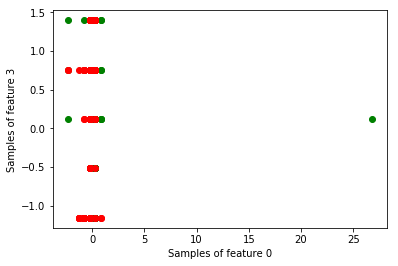

In [13]:


p_samp = list(np.where(y==1)[0])
n_samp = list(np.where(y==0)[0])

pp.figure()
pp.plot(X[p_samp, 0], X[p_samp, 3], 'go')
pp.plot(X[n_samp, 0], X[n_samp, 3], 'ro')
#pp.plot(X[p_samp, 2], X[p_samp, 3], 'bo')
#pp.plot(X[n_samp, 2], X[n_samp, 3], 'yo')
pp.xlabel("Samples of feature 0")
pp.ylabel("Samples of feature 3")
pp.show()

#plot the 2 most important features as x,y and compare positive classification to negative

In [12]:

import matplotlib.gridspec as gridspec
import itertools
from mlxtend.classifier import EnsembleVoteClassifier

from mlxtend.plotting import plot_decision_regions

# Initializing Classifiers
clF1 = rfr(n_estimators=20, random_state=355)

C = 0.2
clF2 = svm.SVC(kernel='linear', C=C)
clF3 = neighbors.KNeighborsClassifier(n_neighbors=9)
eclf = EnsembleVoteClassifier(clfs=[clF1, clF2, clF3],
                              weights=[2, 1, 1], voting='soft')

X2 = mmg[["BI-RADS", "Margin"]].values
X2 = preprocessing.StandardScaler().fit_transform(X2)
#rf = rfr(n_estimators=20, random_state=355)
 #   rf.fit(X_t, y_t)
# Loading some example data
print X2.shape

# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = pp.figure(figsize=(10, 8))

labels = ['Random Forest',
          'linear svm',
          'KNN',
          'Ensemble']

for clf, lab, grd in zip([clF1, clF2, clF3, eclf],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = pp.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X2, y=y.flatten(),
                                clf=clf, legend=2)
    pp.title(lab)

pp.show()

(830, 2)


ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 2 